# Spotify popularity

The objective of the project is to create a model that predicts the popularity of a song based on its characteristics.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [162]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.cluster import KMeans
from sklearn.preprocessing import FunctionTransformer, MinMaxScaler, OneHotEncoder
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_selector, make_column_transformer
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.base import BaseEstimator, TransformerMixin
# This will help to visualize pipelines
from sklearn import set_config; set_config(display='diagram')

# Load and clean data

In [3]:
df = pd.read_csv('data/spotify_popularity_train.csv')
df.head()

,acousticness,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,artist
0,0.65400,0.499,219827,0.190,0,0B6BeEUd6UwFlbsHMQKjob,0.004090,7,0.0898,-16.435,1,Back in the Goodle Days,40,1971,0.0454,149.460,0.4300,John Hartford
1,0.00592,0.439,483948,0.808,0,5Gpx4lJy3vKmIvjwbiR5c8,0.140000,2,0.0890,-8.497,1,Worlds Which Break Us - Intro Mix,22,2015-02-02,0.0677,138.040,0.0587,Driftmoon
2,0.73400,0.523,245693,0.288,0,7MxuUYqrCIy93h1EEHrIrL,0.000000,0,0.0771,-11.506,1,I'm The Greatest Star,40,1968-09-01,0.2140,75.869,0.4640,Barbra Streisand
3,0.42900,0.681,130026,0.165,0,4GeYbfIx1vSQXTfQb1m8Th,0.000000,11,0.3940,-21.457,0,Kapitel 281 - Der Page und die Herzogin,1,1926,0.9460,145.333,0.2880,Georgette Heyer
4,0.56200,0.543,129813,0.575,0,2JPGGZwajjMk0vvhfC17RK,0.000004,2,0.1270,-7.374,1,Away from You,15,2008-02-11,0.0265,139.272,0.8010,Gerry & The Pacemakers


In [4]:
df.shape

(52317, 18)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52317 entries, 0 to 52316
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      52317 non-null  float64
 1   danceability      52317 non-null  float64
 2   duration_ms       52317 non-null  int64  
 3   energy            52317 non-null  float64
 4   explicit          52317 non-null  int64  
 5   id                52317 non-null  object 
 6   instrumentalness  52317 non-null  float64
 7   key               52317 non-null  int64  
 8   liveness          52317 non-null  float64
 9   loudness          52317 non-null  float64
 10  mode              52317 non-null  int64  
 11  name              52317 non-null  object 
 12  popularity        52317 non-null  int64  
 13  release_date      52317 non-null  object 
 14  speechiness       52317 non-null  float64
 15  tempo             52317 non-null  float64
 16  valence           52317 non-null  float6

In [8]:
# How many duplicates
print(len(df))
df.duplicated().sum()

52317


260

In [9]:
# Drop duplicates
df = df.drop_duplicates()
df.shape

(52057, 18)

In [13]:
# % of missing values
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values(by='percent_missing', ascending=False)

,column_name,percent_missing
artist,artist,0.007684
danceability,danceability,0.000000
valence,valence,0.000000
tempo,tempo,0.000000
speechiness,speechiness,0.000000
release_date,release_date,0.000000
popularity,popularity,0.000000
name,name,0.000000
mode,mode,0.000000
acousticness,acousticness,0.000000


In [14]:
# Dropna
df = df.dropna()
df.shape

(52053, 18)

# Data visualisation

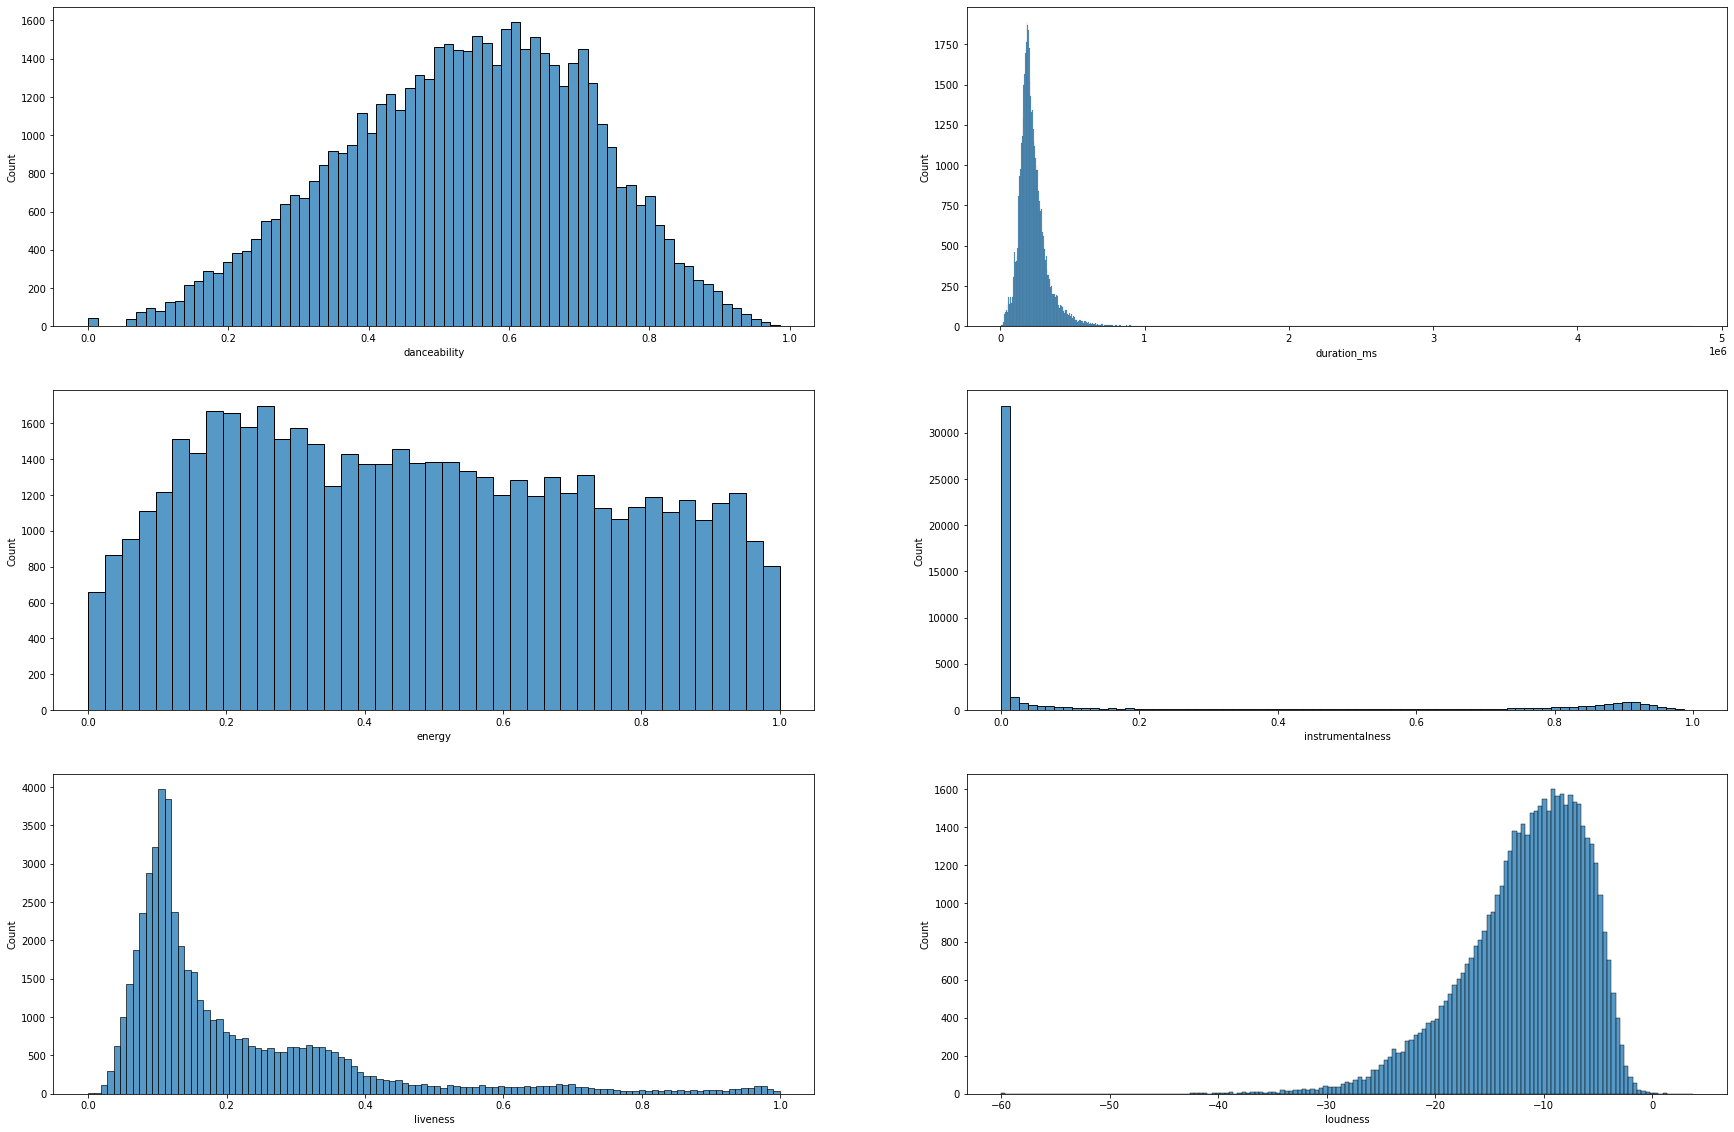

In [73]:
# Histplots
plt.figure(figsize = (30, 20))
plt.subplot(321)
sns.histplot(df['danceability'])
plt.subplot(322)
sns.histplot(df['duration_ms'])
plt.subplot(323)
sns.histplot(df['energy'])
plt.subplot(324)
sns.histplot(df['instrumentalness'])
plt.subplot(325)
sns.histplot(df['liveness'])
plt.subplot(326)
sns.histplot(df['loudness'])
plt.show()

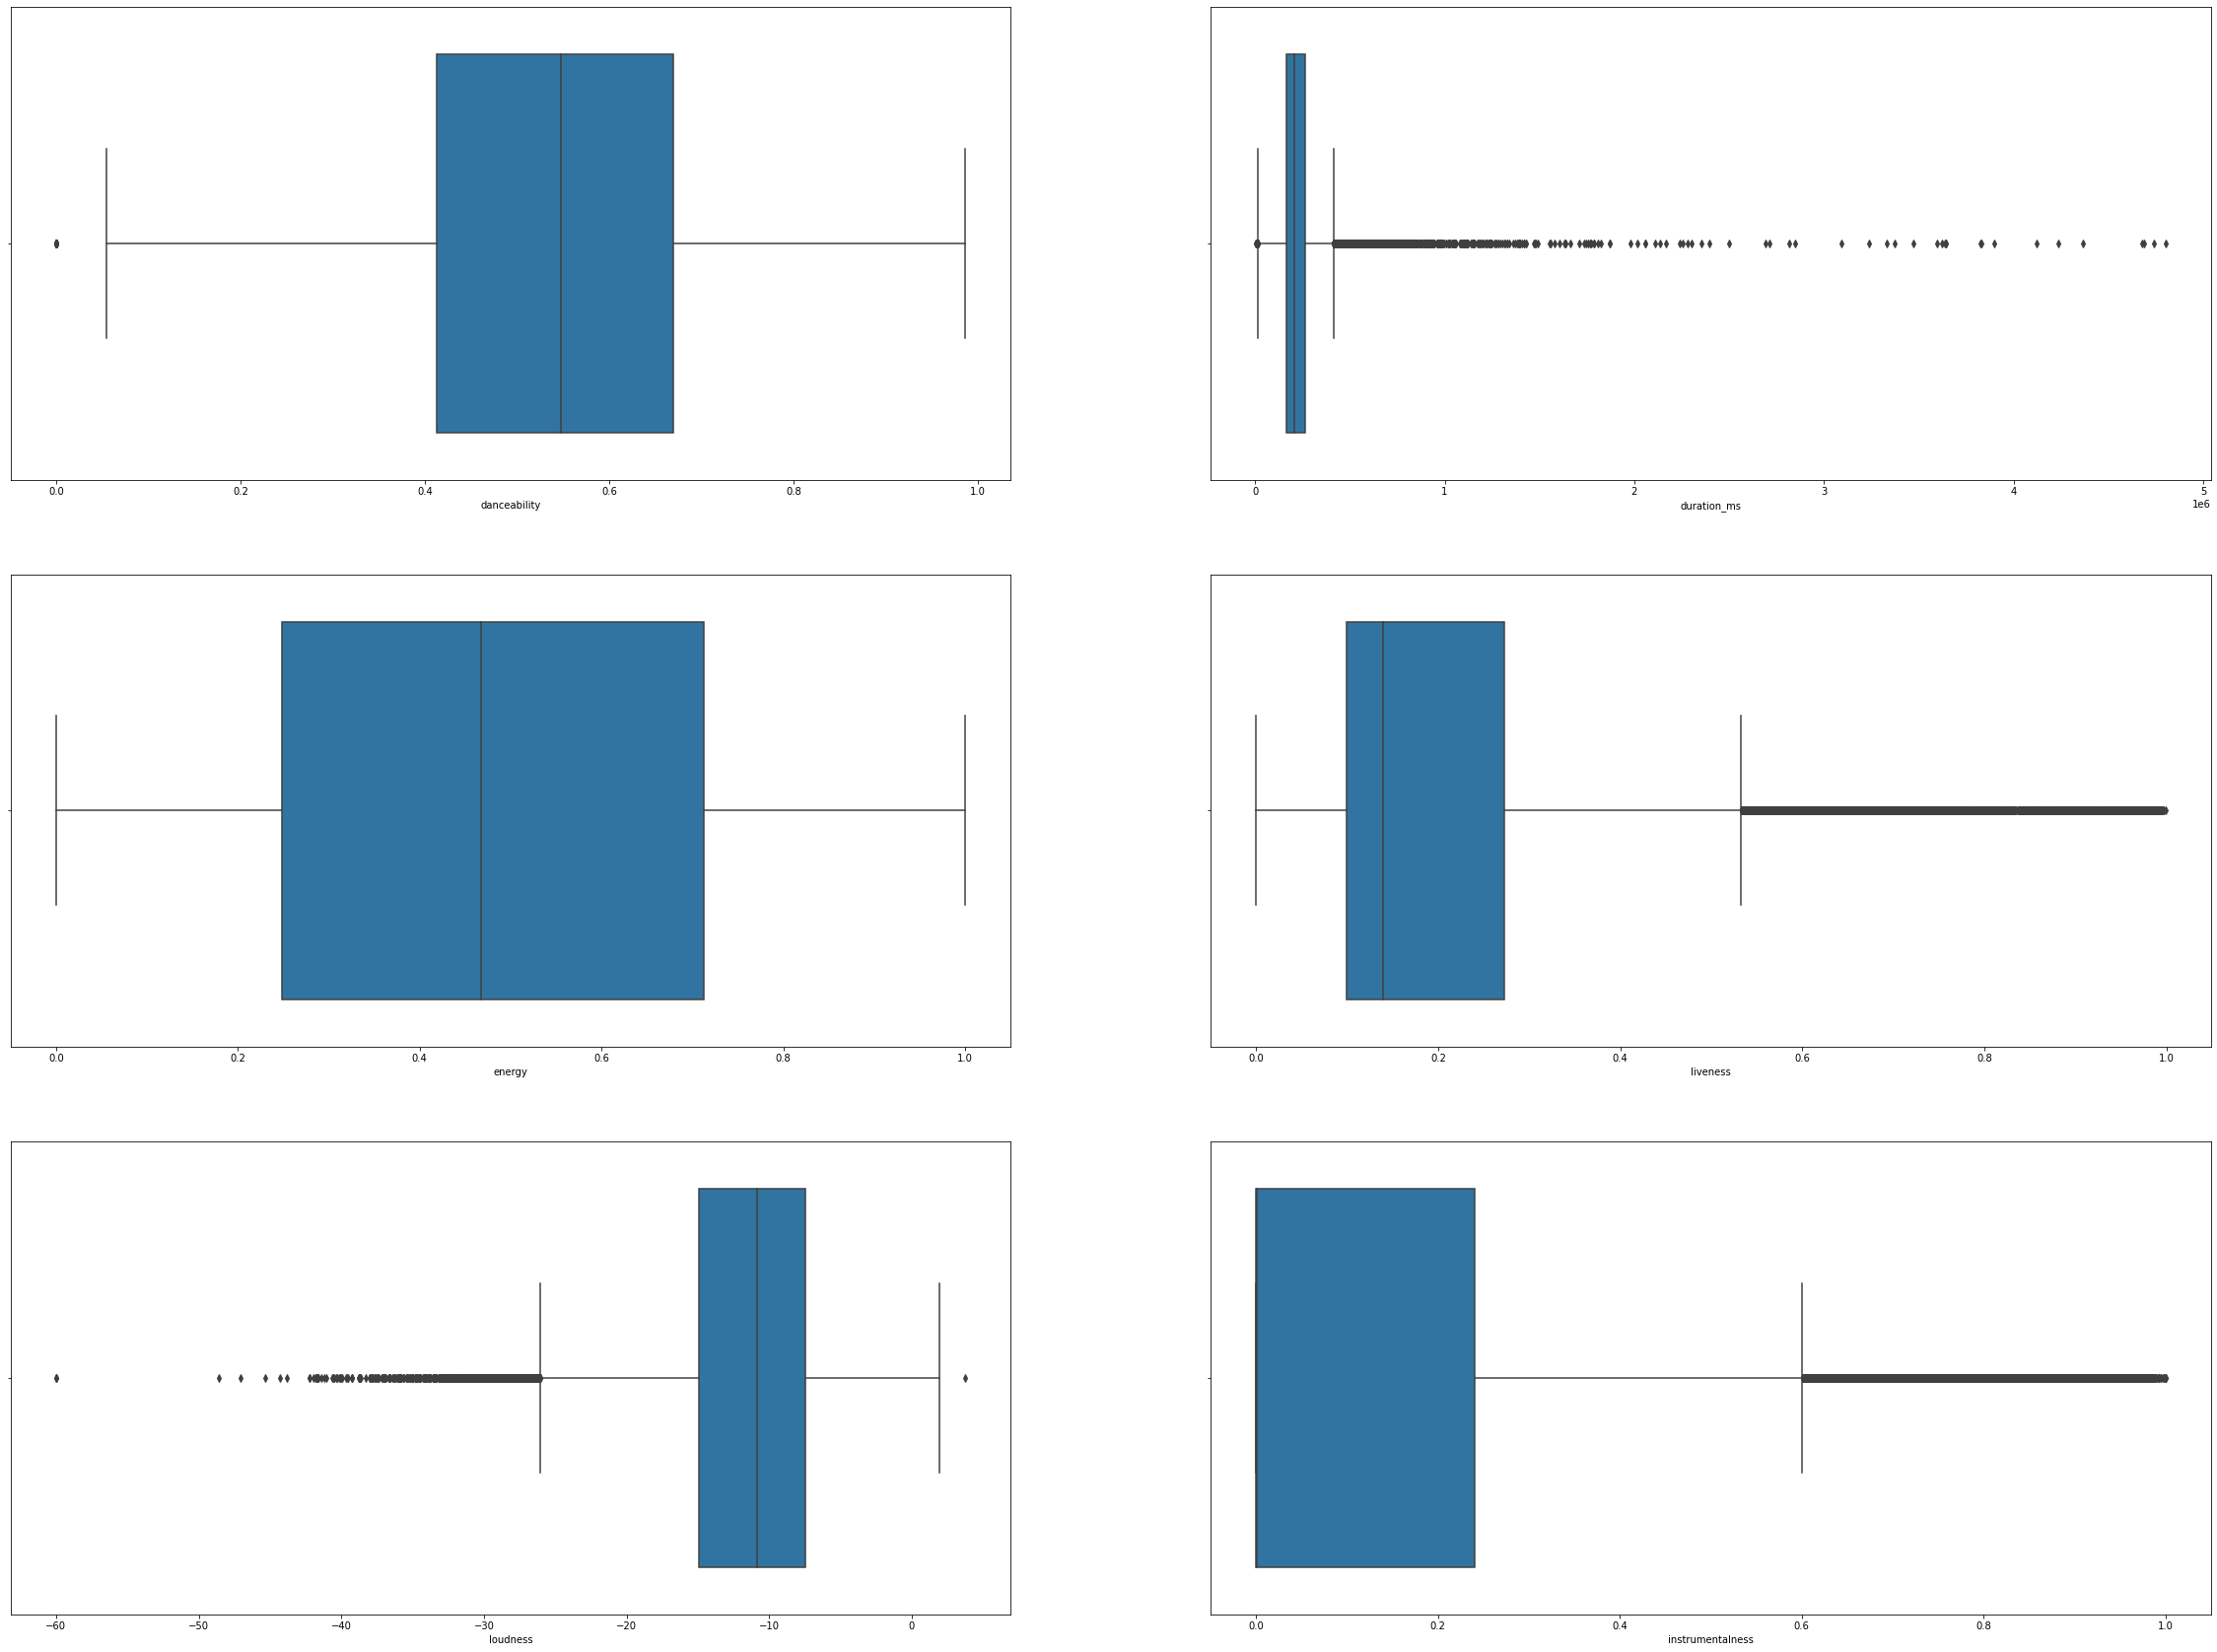

In [80]:
# Boxplot
plt.figure(figsize = (40, 30))
plt.subplot(321)
sns.boxplot(data=df, x='danceability')
plt.subplot(322)
sns.boxplot(data=df, x='duration_ms')
plt.subplot(323)
sns.boxplot(data=df, x='energy')
plt.subplot(324)
sns.boxplot(data=df, x='liveness')
plt.subplot(325)
sns.boxplot(data=df, x='loudness')
plt.subplot(326)
sns.boxplot(data=df, x='instrumentalness')
plt.show()

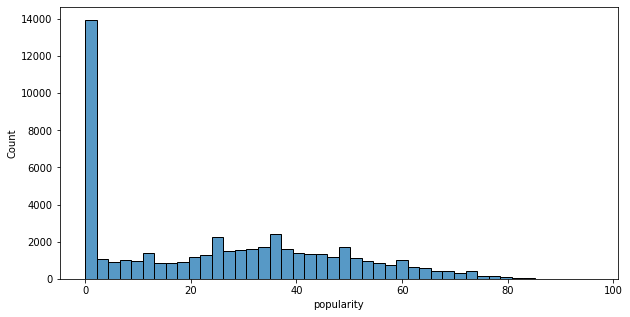

In [83]:
# Target popularity
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='popularity');

In [98]:
# Target popularity
df.popularity.describe()

count    52053.000000
mean        25.815188
std         21.864219
min          0.000000
25%          1.000000
50%         26.000000
75%         42.000000
max         96.000000
Name: popularity, dtype: float64

In [99]:
# Target popularity
print('\n**Valeurs uniques**')
print(df['popularity'].unique())
print('\n**Nb catégorie**')
print(df['popularity'].nunique())


**Valeurs uniques**
[40 22  1 15 30 57 41  0 31  3 25 83 50 10 35  4 16 12 37 71 65 67 23 34
 32 80 33 20  7 48 56 46  9 36 28 47 64  8 51 11 29 14 55 26 53 24 13  2
 62 19 58 77 38 61 42 43 21 27 45 72 39  5 54 17 63 75 69  6 68 73 52 49
 90 87 74 44 70 18 59 66 60 78 82 79 76 85 89 81 84 92 88 86 91 94 96]

**Nb catégorie**
95


# Supervised learning

## Scoring metrics

Scoring metric : 
- we want to penalize largest errors relatively to smaller ones
- measure errors in the same unit as the target `popularity` 
- the greater, the better (metric_good_model > metric_bad_model) 

**=> I choose : neg_root_mean_squared_error**

In [91]:
# Method for the scorong metrics
def neg_RMSE(y_true, y_pred):
    return -mean_squared_error(y_true, y_pred, squared=False)

## Define X and y

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52053 entries, 0 to 52316
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      52053 non-null  float64
 1   danceability      52053 non-null  float64
 2   duration_ms       52053 non-null  int64  
 3   energy            52053 non-null  float64
 4   explicit          52053 non-null  int64  
 5   id                52053 non-null  object 
 6   instrumentalness  52053 non-null  float64
 7   key               52053 non-null  int64  
 8   liveness          52053 non-null  float64
 9   loudness          52053 non-null  float64
 10  mode              52053 non-null  int64  
 11  name              52053 non-null  object 
 12  popularity        52053 non-null  int64  
 13  release_date      52053 non-null  object 
 14  speechiness       52053 non-null  float64
 15  tempo             52053 non-null  float64
 16  valence           52053 non-null  float6

In [86]:
# Define X_simple (only numerical features) and y (target = popularity)
X_simple = df.select_dtypes(include=['int64', 'float64'])
X_simple = X_simple.drop(columns='popularity')
X_simple.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52053 entries, 0 to 52316
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      52053 non-null  float64
 1   danceability      52053 non-null  float64
 2   duration_ms       52053 non-null  int64  
 3   energy            52053 non-null  float64
 4   explicit          52053 non-null  int64  
 5   instrumentalness  52053 non-null  float64
 6   key               52053 non-null  int64  
 7   liveness          52053 non-null  float64
 8   loudness          52053 non-null  float64
 9   mode              52053 non-null  int64  
 10  speechiness       52053 non-null  float64
 11  tempo             52053 non-null  float64
 12  valence           52053 non-null  float64
dtypes: float64(9), int64(4)
memory usage: 7.6 MB


In [90]:
y = df['popularity']

## Baseline

In [101]:
# My baseline could be a constant prediction equivalent to the mean value of the target popularity
y_base = np.ones(len(y)) * y.mean()
baseline_score = neg_RMSE(y, y_base)
baseline_score

-21.86400900273424

## Holdout evaluation

In [107]:
# Train test split with 50% of observations as test set
X_train_simple, X_test_simple, y_train, y_test = train_test_split(X_simple, y, test_size=0.5, random_state=42)
X_train_simple.shape, y_train.shape

((26026, 13), (26026,))

In [110]:
X_test_simple.shape, y_test.shape

((26027, 13), (26027,))

In [108]:
# Let's start with a very simple model : a linear regression
model_simple = LinearRegression()
model_simple.fit(X_train_simple, y_train)

LinearRegression()

In [111]:
# Prediction & scoring
y_pred_linear = model_simple.predict(X_test_simple)
score_simple_holdout = neg_RMSE(y_test, y_pred_linear)
score_simple_holdout

-18.391930486294505

**The score is even better than the baseline, with a very simple model !**

## Cross-validation evaluation

In [112]:
model_cross = LinearRegression()
result = cross_validate(model_cross, X_simple, y, cv=5, scoring='neg_root_mean_squared_error')
result

{'fit_time': array([0.01632261, 0.04375052, 0.02636766, 0.02099276, 0.0203433 ]),
 'score_time': array([0.0119369 , 0.00809598, 0.00464892, 0.00399446, 0.00390935]),
 'test_score': array([-18.41383767, -18.45203104, -18.30188799, -18.43790327,
        -18.19713279])}

In [114]:
score_simple_cv_mean = result['test_score'].mean()
score_simple_cv_mean

-18.36055855156932

In [115]:
score_simple_cv_std = result['test_score'].std()
score_simple_cv_std

0.0973019003915168

**The score is similar to the simple holdout evaluation**

# Feature engineering

In [116]:
df.head()

,acousticness,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,artist
0,0.65400,0.499,219827,0.190,0,0B6BeEUd6UwFlbsHMQKjob,0.004090,7,0.0898,-16.435,1,Back in the Goodle Days,40,1971,0.0454,149.460,0.4300,John Hartford
1,0.00592,0.439,483948,0.808,0,5Gpx4lJy3vKmIvjwbiR5c8,0.140000,2,0.0890,-8.497,1,Worlds Which Break Us - Intro Mix,22,2015-02-02,0.0677,138.040,0.0587,Driftmoon
2,0.73400,0.523,245693,0.288,0,7MxuUYqrCIy93h1EEHrIrL,0.000000,0,0.0771,-11.506,1,I'm The Greatest Star,40,1968-09-01,0.2140,75.869,0.4640,Barbra Streisand
3,0.42900,0.681,130026,0.165,0,4GeYbfIx1vSQXTfQb1m8Th,0.000000,11,0.3940,-21.457,0,Kapitel 281 - Der Page und die Herzogin,1,1926,0.9460,145.333,0.2880,Georgette Heyer
4,0.56200,0.543,129813,0.575,0,2JPGGZwajjMk0vvhfC17RK,0.000004,2,0.1270,-7.374,1,Away from You,15,2008-02-11,0.0265,139.272,0.8010,Gerry & The Pacemakers


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52053 entries, 0 to 52316
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      52053 non-null  float64
 1   danceability      52053 non-null  float64
 2   duration_ms       52053 non-null  int64  
 3   energy            52053 non-null  float64
 4   explicit          52053 non-null  int64  
 5   id                52053 non-null  object 
 6   instrumentalness  52053 non-null  float64
 7   key               52053 non-null  int64  
 8   liveness          52053 non-null  float64
 9   loudness          52053 non-null  float64
 10  mode              52053 non-null  int64  
 11  name              52053 non-null  object 
 12  popularity        52053 non-null  int64  
 13  release_date      52053 non-null  object 
 14  speechiness       52053 non-null  float64
 15  tempo             52053 non-null  float64
 16  valence           52053 non-null  float6

## Year of the track

In [118]:
# From release_date (which not in X_simple), we can extract the year of the tracks as an integer
df['release_date'] = pd.to_datetime(df['release_date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52053 entries, 0 to 52316
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   acousticness      52053 non-null  float64       
 1   danceability      52053 non-null  float64       
 2   duration_ms       52053 non-null  int64         
 3   energy            52053 non-null  float64       
 4   explicit          52053 non-null  int64         
 5   id                52053 non-null  object        
 6   instrumentalness  52053 non-null  float64       
 7   key               52053 non-null  int64         
 8   liveness          52053 non-null  float64       
 9   loudness          52053 non-null  float64       
 10  mode              52053 non-null  int64         
 11  name              52053 non-null  object        
 12  popularity        52053 non-null  int64         
 13  release_date      52053 non-null  datetime64[ns]
 14  speechiness       5205

In [119]:
# Create X_eng which is X_simple + the year of the track
X_eng = X_simple
X_eng['year'] = df['release_date'].apply(lambda x: int(x.strftime('%Y')))
X_eng.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52053 entries, 0 to 52316
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      52053 non-null  float64
 1   danceability      52053 non-null  float64
 2   duration_ms       52053 non-null  int64  
 3   energy            52053 non-null  float64
 4   explicit          52053 non-null  int64  
 5   instrumentalness  52053 non-null  float64
 6   key               52053 non-null  int64  
 7   liveness          52053 non-null  float64
 8   loudness          52053 non-null  float64
 9   mode              52053 non-null  int64  
 10  speechiness       52053 non-null  float64
 11  tempo             52053 non-null  float64
 12  valence           52053 non-null  float64
 13  year              52053 non-null  int64  
dtypes: float64(9), int64(5)
memory usage: 8.0 MB


In [121]:
X_eng['year'].unique()

array([1971, 2015, 1968, 1926, 2008, 1986, 1963, 1978, 2010, 1962, 2020,
       1950, 1965, 1955, 1930, 2019, 1994, 1979, 1956, 1940, 1997, 1924,
       1961, 1969, 1959, 1952, 1975, 2016, 1990, 1991, 2012, 1935, 1987,
       1980, 1995, 1996, 1998, 1946, 2014, 1993, 2018, 2003, 2011, 1957,
       1977, 1942, 1988, 2006, 1943, 1929, 1934, 1989, 1945, 1958, 1932,
       2009, 1976, 2021, 1983, 1984, 1982, 2017, 1941, 1928, 2007, 2004,
       1970, 1999, 1948, 2013, 2005, 1985, 1951, 1922, 1974, 1953, 1936,
       1947, 1954, 1973, 1960, 1964, 2002, 1972, 1967, 1920, 1939, 2000,
       1937, 1992, 1949, 2001, 1921, 1933, 1981, 1966, 1927, 1931, 1944,
       1925, 1923, 1938])

In [122]:
# Let's check the impact of the new feature 'year' on my model
model_eng = LinearRegression()
result_eng = cross_validate(model_eng, X_eng, y, cv=5, scoring='neg_root_mean_squared_error')
result_eng

{'fit_time': array([0.01900363, 0.0266459 , 0.02823853, 0.02510881, 0.02107501]),
 'score_time': array([0.00937319, 0.00773621, 0.00649071, 0.00594497, 0.0039711 ]),
 'test_score': array([-17.4412204 , -17.4317139 , -17.2453717 , -17.32187397,
        -17.06965388])}

In [124]:
score_eng = result_eng['test_score'].mean()
score_eng

-17.301966769706553

**The score is a little bit better with the feature Year !**

## Clustering

Now we want to assign each track to a cluster using Kmeans, with 5 clusters 

In [125]:
# Kmeans with 5 clusters
km = KMeans(n_clusters=5)
km.fit(X_simple)

KMeans(n_clusters=5)

In [126]:
km.cluster_centers_.shape

(5, 14)

In [135]:
km.labels_

array([0, 1, 0, ..., 0, 0, 0], dtype=int32)

Text(0, 0.5, 'PC 2')

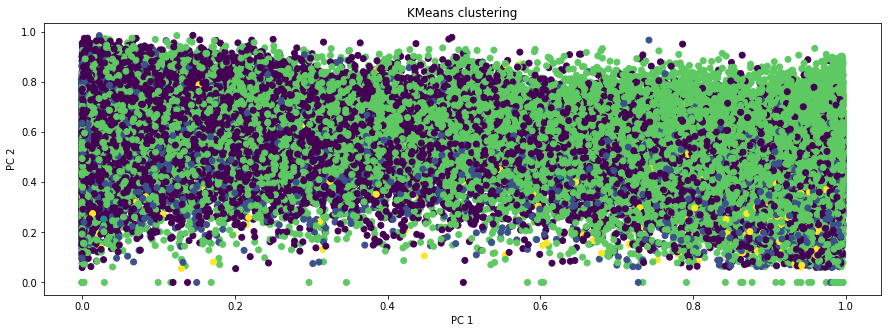

In [138]:
# Plot of the clusters
plt.figure(figsize=(15,5))
plt.scatter(X_simple.iloc[:,0], X_simple.iloc[:,1], c=km.labels_)
plt.title('KMeans clustering'); plt.xlabel('PC 1'); plt.ylabel('PC 2')

In [139]:
# Add the feature clusters in my X_eng
X_eng['clusters'] = km.predict(X_simple)
X_eng.head()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,year,clusters
0,0.65400,0.499,219827,0.190,0,0.004090,7,0.0898,-16.435,1,0.0454,149.460,0.4300,1971,0
1,0.00592,0.439,483948,0.808,0,0.140000,2,0.0890,-8.497,1,0.0677,138.040,0.0587,2015,1
2,0.73400,0.523,245693,0.288,0,0.000000,0,0.0771,-11.506,1,0.2140,75.869,0.4640,1968,0
3,0.42900,0.681,130026,0.165,0,0.000000,11,0.3940,-21.457,0,0.9460,145.333,0.2880,1926,3
4,0.56200,0.543,129813,0.575,0,0.000004,2,0.1270,-7.374,1,0.0265,139.272,0.8010,2008,3


In [140]:
X_eng['clusters'].unique()

array([0, 1, 3, 2, 4], dtype=int32)

In [141]:
# We can now check the impact in our model
model_km = LinearRegression()
result_km = cross_validate(model_km, X_eng, y, cv=5, scoring='neg_root_mean_squared_error')
score_km = result_km['test_score'].mean()
score_km

-17.242802136958584

**The score is similar with or without clustering.**

# Preprocessing

Let's construct a preprocessing pipeline.

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52053 entries, 0 to 52316
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   acousticness      52053 non-null  float64       
 1   danceability      52053 non-null  float64       
 2   duration_ms       52053 non-null  int64         
 3   energy            52053 non-null  float64       
 4   explicit          52053 non-null  int64         
 5   id                52053 non-null  object        
 6   instrumentalness  52053 non-null  float64       
 7   key               52053 non-null  int64         
 8   liveness          52053 non-null  float64       
 9   loudness          52053 non-null  float64       
 10  mode              52053 non-null  int64         
 11  name              52053 non-null  object        
 12  popularity        52053 non-null  int64         
 13  release_date      52053 non-null  datetime64[ns]
 14  speechiness       5205

In [145]:
# Define X and y
X = df.drop(columns='popularity')
y = df['popularity']

In [147]:
# Check of the 'object' features
X.select_dtypes(include='object').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52053 entries, 0 to 52316
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      52053 non-null  object
 1   name    52053 non-null  object
 2   artist  52053 non-null  object
dtypes: object(3)
memory usage: 3.6+ MB


In [149]:
# How many unique values do they have ?
print(X.id.nunique())
print(X.name.nunique())
print(X.artist.nunique())

52053
46641
12577


=> To many unique values, not possible to on-hot encode them

## Year of the track

In [196]:
# Method to extract the year of a track
def extract_year(df):
    df["release_date"] = pd.to_datetime(df["release_date"], format='%Y-%m-%d').apply(lambda x : x.year)
    return df

In [197]:
# Custom transformer function
transformer_year = FunctionTransformer(extract_year)

In [198]:
# Create the pipeline
pipeline_year = Pipeline([
    ('transform_year', transformer_year),
    ('scaler', MinMaxScaler())
])

## Clusters

In [159]:
# Method of a Kmeans
def process_clusters(clusters):
    return np.argmin(clusters, axis=1).reshape((-1, 1))

# The transform method of a 'KMeans' return an array of shape (n_samples, n_clusters) with the distance to cluster for each pair obs-cluster  
# We then use an `np.argmin` on the rows to get the index of the center the observation is closest to  
# This effectively yields clusters for each observation

In [160]:
# Custom transformer function
transformer_clusters = FunctionTransformer(process_clusters)

In [199]:
# Create the pipeline
pipeline_clusters = Pipeline([
    ('kmeans', KMeans(n_clusters=5)),
    ('transform_clusters', transformer_clusters),
    ('encoderOHE', OneHotEncoder(sparse=False, drop='first', handle_unknown='ignore'))
])

## Artist popularity

In [163]:
# Custom Transformer class for artist popularity
# It computes the average popularity of songs, per artist, on the train set only  
# If the artist is unknown in the test set, the average popularity will be equal to the mean popularity on the train set

class ArtistPopularityTransformer(BaseEstimator, TransformerMixin):
    """
    Compute, as a new feature the artist's popularity
    Do so by computing the mean popularity of all songs from the artist
    Notice that the popularity is computed on the train only to avoid leakage
    """

    def __init__(self):
        pass

    def fit(self, X, y=None):
        """
        process artist mean popularity from artists songs popularity
        process song global mean popularity
        """

        # process artist popularity
        self.artist_popularity = y.groupby(X.artist).agg("mean")
        self.artist_popularity.name = "artist_popularity"

        # process mean popularity
        self.mean_popularity = y.mean()

        return self

    def transform(self, X, y=None):
        """
        apply artist mean popularity vs song global mean popularity to songs
        """

        # inject artist popularity
        X_copy = X.merge(self.artist_popularity, how="left", left_on="artist", right_index=True)

        # fills popularity of unknown artists with song global mean popularity
        X_copy.replace(np.nan, self.mean_popularity, inplace=True)

        return X_copy[["artist_popularity"]]

In [165]:
# Create the pipeline
pipeline_artist = Pipeline([
    ('ArtistPopularityTransform', ArtistPopularityTransformer()),
    ('scaler', MinMaxScaler())
])

## Preprocessing pipeline

In [191]:
# Let's create the preproc pipeline
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52053 entries, 0 to 52316
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   acousticness      52053 non-null  float64       
 1   danceability      52053 non-null  float64       
 2   duration_ms       52053 non-null  int64         
 3   energy            52053 non-null  float64       
 4   explicit          52053 non-null  int64         
 5   id                52053 non-null  object        
 6   instrumentalness  52053 non-null  float64       
 7   key               52053 non-null  int64         
 8   liveness          52053 non-null  float64       
 9   loudness          52053 non-null  float64       
 10  mode              52053 non-null  int64         
 11  name              52053 non-null  object        
 12  release_date      52053 non-null  datetime64[ns]
 13  speechiness       52053 non-null  float64       
 14  tempo             5205

In [200]:
preproc_pipe =  ColumnTransformer([
    ('year_pipe', pipeline_year, ['release_date']),
    ('clusters_pipe', pipeline_clusters, make_column_selector(dtype_include=['int64', 'float64'])),
    ('artist_pipe', pipeline_artist, ['artist']),
    ('scaled_num', MinMaxScaler(), make_column_selector(dtype_include=['int64', 'float64']))
], remainder='drop')
preproc_pipe

ColumnTransformer(transformers=[('year_pipe',
                                 Pipeline(steps=[('transform_year',
                                                  FunctionTransformer(func=<function extract_year at 0x7f60647be3a0>)),
                                                 ('scaler', MinMaxScaler())]),
                                 ['release_date']),
                                ('clusters_pipe',
                                 Pipeline(steps=[('kmeans',
                                                  KMeans(n_clusters=5)),
                                                 ('transform_clusters',
                                                  FunctionTransformer(func=<function process_clusters at 0x7f6058391d30>)),
                                                 ('...
                                                                handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f604fd37400>),
                                ('artist_pipe',
                                 Pipeline(steps=[('ArtistPopularityTransform',
                                                  ArtistPopularityTransformer()),
                                                 ('scaler', MinMaxScaler())]),
                                 ['artist']),
                                ('scaled_num', MinMaxScaler(),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f604fd37d90>)])

# Models

## Linear Model

In [201]:
# Lets'use the linear regression & the pipeline
pipe_linear = make_pipeline(preproc_pipe, LinearRegression())
pipe_linear

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('year_pipe',
                                                  Pipeline(steps=[('transform_year',
                                                                   FunctionTransformer(func=<function extract_year at 0x7f60647be3a0>)),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['release_date']),
                                                 ('clusters_pipe',
                                                  Pipeline(steps=[('kmeans',
                                                                   KMeans(n_clusters=5)),
                                                                  ('transform_clusters',
                                                                   FunctionTransformer(func=<function p...
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f604fd37400>),
                                                 ('artist_pipe',
                                                  Pipeline(steps=[('ArtistPopularityTransform',
                                                                   ArtistPopularityTransformer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['artist']),
                                                 ('scaled_num', MinMaxScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f604fd37d90>)])),
                ('linearregression', LinearRegression())])

In [202]:
# Cross val and score
result_pipe_lin = cross_validate(pipe_linear, X, y, cv=5, scoring='neg_root_mean_squared_error', error_score='raise')
score_pipe_lin = result_pipe_lin['test_score'].mean()
score_pipe_lin

-13.493459190388762

**Our score is improved, and much beter than the baseline (baseline = -21)**

## Ensemble Methods

In [203]:
# Let's try an ensemble method : i choose the Random Forest Regressor
pipe_ensemble = make_pipeline(preproc_pipe, RandomForestRegressor())
pipe_ensemble

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('year_pipe',
                                                  Pipeline(steps=[('transform_year',
                                                                   FunctionTransformer(func=<function extract_year at 0x7f60647be3a0>)),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['release_date']),
                                                 ('clusters_pipe',
                                                  Pipeline(steps=[('kmeans',
                                                                   KMeans(n_clusters=5)),
                                                                  ('transform_clusters',
                                                                   FunctionTransformer(func=<function p...
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f604fd37400>),
                                                 ('artist_pipe',
                                                  Pipeline(steps=[('ArtistPopularityTransform',
                                                                   ArtistPopularityTransformer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['artist']),
                                                 ('scaled_num', MinMaxScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f604fd37d90>)])),
                ('randomforestregressor', RandomForestRegressor())])

In [204]:
# Cross val and score
result_pipe_ens = cross_validate(pipe_ensemble, X, y, cv=5, scoring='neg_root_mean_squared_error', error_score='raise')
score_pipe_ens = result_pipe_ens['test_score'].mean()
score_pipe_ens

-12.002235704659565

**The score is even better with the Random Forest Regressor !**

# Fine-tuning

In [205]:
# Let's try a Grid Search to find the best hyperparameters for our best model (the Random Forest Regressor)
pipe_ensemble.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('year_pipe',
                                    Pipeline(steps=[('transform_year',
                                                     FunctionTransformer(func=<function extract_year at 0x7f60647be3a0>)),
                                                    ('scaler', MinMaxScaler())]),
                                    ['release_date']),
                                   ('clusters_pipe',
                                    Pipeline(steps=[('kmeans',
                                                     KMeans(n_clusters=5)),
                                                    ('transform_clusters',
                                                     FunctionTransformer(func=<function process_clusters at 0x7f6058391d30>)),
                                                    ('...
                                                                   handle_unknown='ignore',
                          

In [206]:
# Select the hyperparameters
grid = {
    'randomforestregressor__n_estimators': (10, 50, 100),
    'randomforestregressor__min_samples_split': (1, 2, 3)
}

In [207]:
# Grid Search 
search = GridSearchCV(
    pipe_ensemble,
    param_grid=grid,
    cv=5,
    scoring='neg_root_mean_squared_error',
    verbose=3
)

In [208]:
# Fit
search.fit(X,y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END randomforestregressor__min_samples_split=1, randomforestregressor__n_estimators=10;, score=nan total time=   2.3s
[CV 2/5] END randomforestregressor__min_samples_split=1, randomforestregressor__n_estimators=10;, score=nan total time=   2.3s
[CV 3/5] END randomforestregressor__min_samples_split=1, randomforestregressor__n_estimators=10;, score=nan total time=   2.2s
[CV 4/5] END randomforestregressor__min_samples_split=1, randomforestregressor__n_estimators=10;, score=nan total time=   2.5s
[CV 5/5] END randomforestregressor__min_samples_split=1, randomforestregressor__n_estimators=10;, score=nan total time=   2.2s
[CV 1/5] END randomforestregressor__min_samples_split=1, randomforestregressor__n_estimators=50;, score=nan total time=   2.3s
[CV 2/5] END randomforestregressor__min_samples_split=1, randomforestregressor__n_estimators=50;, score=nan total time=   2.5s
[CV 3/5] END randomforestregressor__min_samples_spl

/home/ameliermd/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
15 fits failed out of a total of 45.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/home/ameliermd/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/ameliermd/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/ameliermd/.pyenv/versions/3.8.12/e

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('year_pipe',
                                                                         Pipeline(steps=[('transform_year',
                                                                                          FunctionTransformer(func=<function extract_year at 0x7f60647be3a0>)),
                                                                                         ('scaler',
                                                                                          MinMaxScaler())]),
                                                                         ['release_date']),
                                                                        ('clusters_pipe',
                                                                         Pipeline(steps=[('kmeans',
                                                                                          KMeans(n_clusters=5)),
                                                                                         ('transform_clusters',
                                                                                          Functio...
                                                                                          MinMaxScaler())]),
                                                                         ['artist']),
                                                                        ('scaled_num',
                                                                         MinMaxScaler(),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f604fd37d90>)])),
                                       ('randomforestregressor',
                                        RandomForestRegressor())]),
             param_grid={'randomforestregressor__min_samples_split': (1, 2, 3),
                         'randomforestregressor__n_estimators': (10, 50, 100)},
             scoring='neg_root_mean_squared_error', verbose=3)

In [209]:
search.best_params_

{'randomforestregressor__min_samples_split': 2,
 'randomforestregressor__n_estimators': 100}

In [210]:
# Best score ?
search.best_score_

-11.949095282816458

**This score is the best for our model. For the record, the baseline score was -21**

# Classification Task

It seems to be difficult to improve our model. 

We can try to convert our problem in a classification task : to know whether a song is above or below popularity median.

In [213]:
# Create the new target
print(y.median())
y_cat = (y >= y.median()) * 1
y_cat

26.0


0        1
1        0
2        1
3        0
4        0
        ..
52312    0
52313    1
52314    0
52315    0
52316    1
Name: popularity, Length: 52053, dtype: int64

In [214]:
# Pipeline
pipe_cat = make_pipeline(preproc_pipe, LogisticRegression())
pipe_cat

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('year_pipe',
                                                  Pipeline(steps=[('transform_year',
                                                                   FunctionTransformer(func=<function extract_year at 0x7f60647be3a0>)),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['release_date']),
                                                 ('clusters_pipe',
                                                  Pipeline(steps=[('kmeans',
                                                                   KMeans(n_clusters=5)),
                                                                  ('transform_clusters',
                                                                   FunctionTransformer(func=<function p...
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f604fd37400>),
                                                 ('artist_pipe',
                                                  Pipeline(steps=[('ArtistPopularityTransform',
                                                                   ArtistPopularityTransformer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['artist']),
                                                 ('scaled_num', MinMaxScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f604fd37d90>)])),
                ('logisticregression', LogisticRegression())])

In [216]:
# Cross validation with a logictic regression and score
result_cat = cross_validate(pipe_cat, X, y_cat, cv=5, scoring='accuracy')
score_cat = result_cat['test_score'].mean()
score_cat

0.8309992211555594